### Project using CNN (for image detection)
*   Explore new dataset or reuse CNN-1 dataset
*   Create and design your model
*   Tune your models by changing
*   Number of convolutional layers
*   Number of units of convolutional layers
*   drop out rate
*   number of dense layers
*   number of units of dense layers
*   optimizer
*   learning rate
*   batch size
*   Epoch


###Use test data as validation data (increase the training data)


*   Plot the performance history of different models
*   Analyze the effect of structure/hyper-parameters of CNN


*   Summarize the best model with the best performance of test data for competition in class. The competition is based on three criteria, accuracy, timing, and code efficiency.
*   Study the VGG model from the literature and write your reflection. (Optional)
https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c

Original Paper https://arxiv.org/pdf/1409.1556.pdf





#Data Use

The data used was from Kaggle [Vehicle Image Detection](https://www.kaggle.com/datasets/brsdincer/vehicle-detection-image-set). The main objective was to use CNN to compute a model for non_vehicle and vehicle image.

The model was used in reference to Cat vs dogs sample to test on the image data set. A total of 4000 images is used for training and a total of 2000 images is being used for validation.

Note: Image used is randomly selected by myself to use for training and validation.


#Conclusion
In the end using model inceptionV3, produces a **higher** validation accuracy and **lower** validation loss. The train model using a parameter of **16 millions** as compare to the self build CNN model which resulted in a **higher** validation loss and **lower** validation accuracy using a parameter of approximately **1 million**.

In terms of time used, more time is consumed using other models but it yields better results as opposed to self built layer model which does not consumes alot of time but yields lower result.

In terms of coding complexity, this shall dependent of whether certain changes is added to layer is added to the model or modification is made to the images data such as data augmentation.

There are [other models](https://keras.io/api/applications/) are yet to be tested in these data set which could result in better validation results. In these model, since we are finding out from **2 classes**, binary crossentropy activation is used and relu activation is used for multiple layer of 2D convolution.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/SDAIE/AIRP2/Project1/Vehicle_Detection_Image.zip > /dev/null

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import os
import zipfile
import random

#from tensorflow.keras import layers
#from tensorflow.keras import Model
from keras.applications.inception_v3 import InceptionV3
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Activation
from keras.utils.image_utils import array_to_img, img_to_array, load_img

In [ ]:
# image dimensions, set as per your preference.
img_width, img_height = 64, 64

base_dir = '/content/Vehicle_Detection_Image/data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_nonveh_dir = os.path.join(train_dir, 'non-vehicles')

# Directory with our training dog pictures
train_veh_dir = os.path.join(train_dir, 'vehicles')

# Directory with our validation cat pictures
validation_nonveh_dir = os.path.join(validation_dir, 'non-vehicles')

# Directory with our validation dog pictures
validation_veh_dir = os.path.join(validation_dir, 'vehicles')

In [ ]:
train_nonveh_fnames = os.listdir(train_nonveh_dir)
print(train_nonveh_fnames[:10])

train_veh_fnames = os.listdir(train_veh_dir)
train_veh_fnames.sort()
print(train_veh_fnames[:10])

['extra562.png', 'extra557.png', 'extra1599.png', 'extra433.png', 'extra352.png', 'extra2188.png', 'extra1803.png', 'extra1887.png', 'extra830.png', 'extra500.png']
['1.png', '10.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png', '1007.png']


In [ ]:
print('total training vehicle images:', len(os.listdir(train_veh_dir)))
print('total training non-vehicles images:', len(os.listdir(train_nonveh_dir)))
print('total validation vehicle images:', len(os.listdir(validation_veh_dir)))
print('total validation non-vehicle images:', len(os.listdir(validation_nonveh_dir)))

total training vehicle images: 2000
total training non-vehicles images: 2000
total validation vehicle images: 1000
total validation non-vehicle images: 1000


In [ ]:
%matplotlib inline
nrows = 6
ncols = 6
pic_index = 0


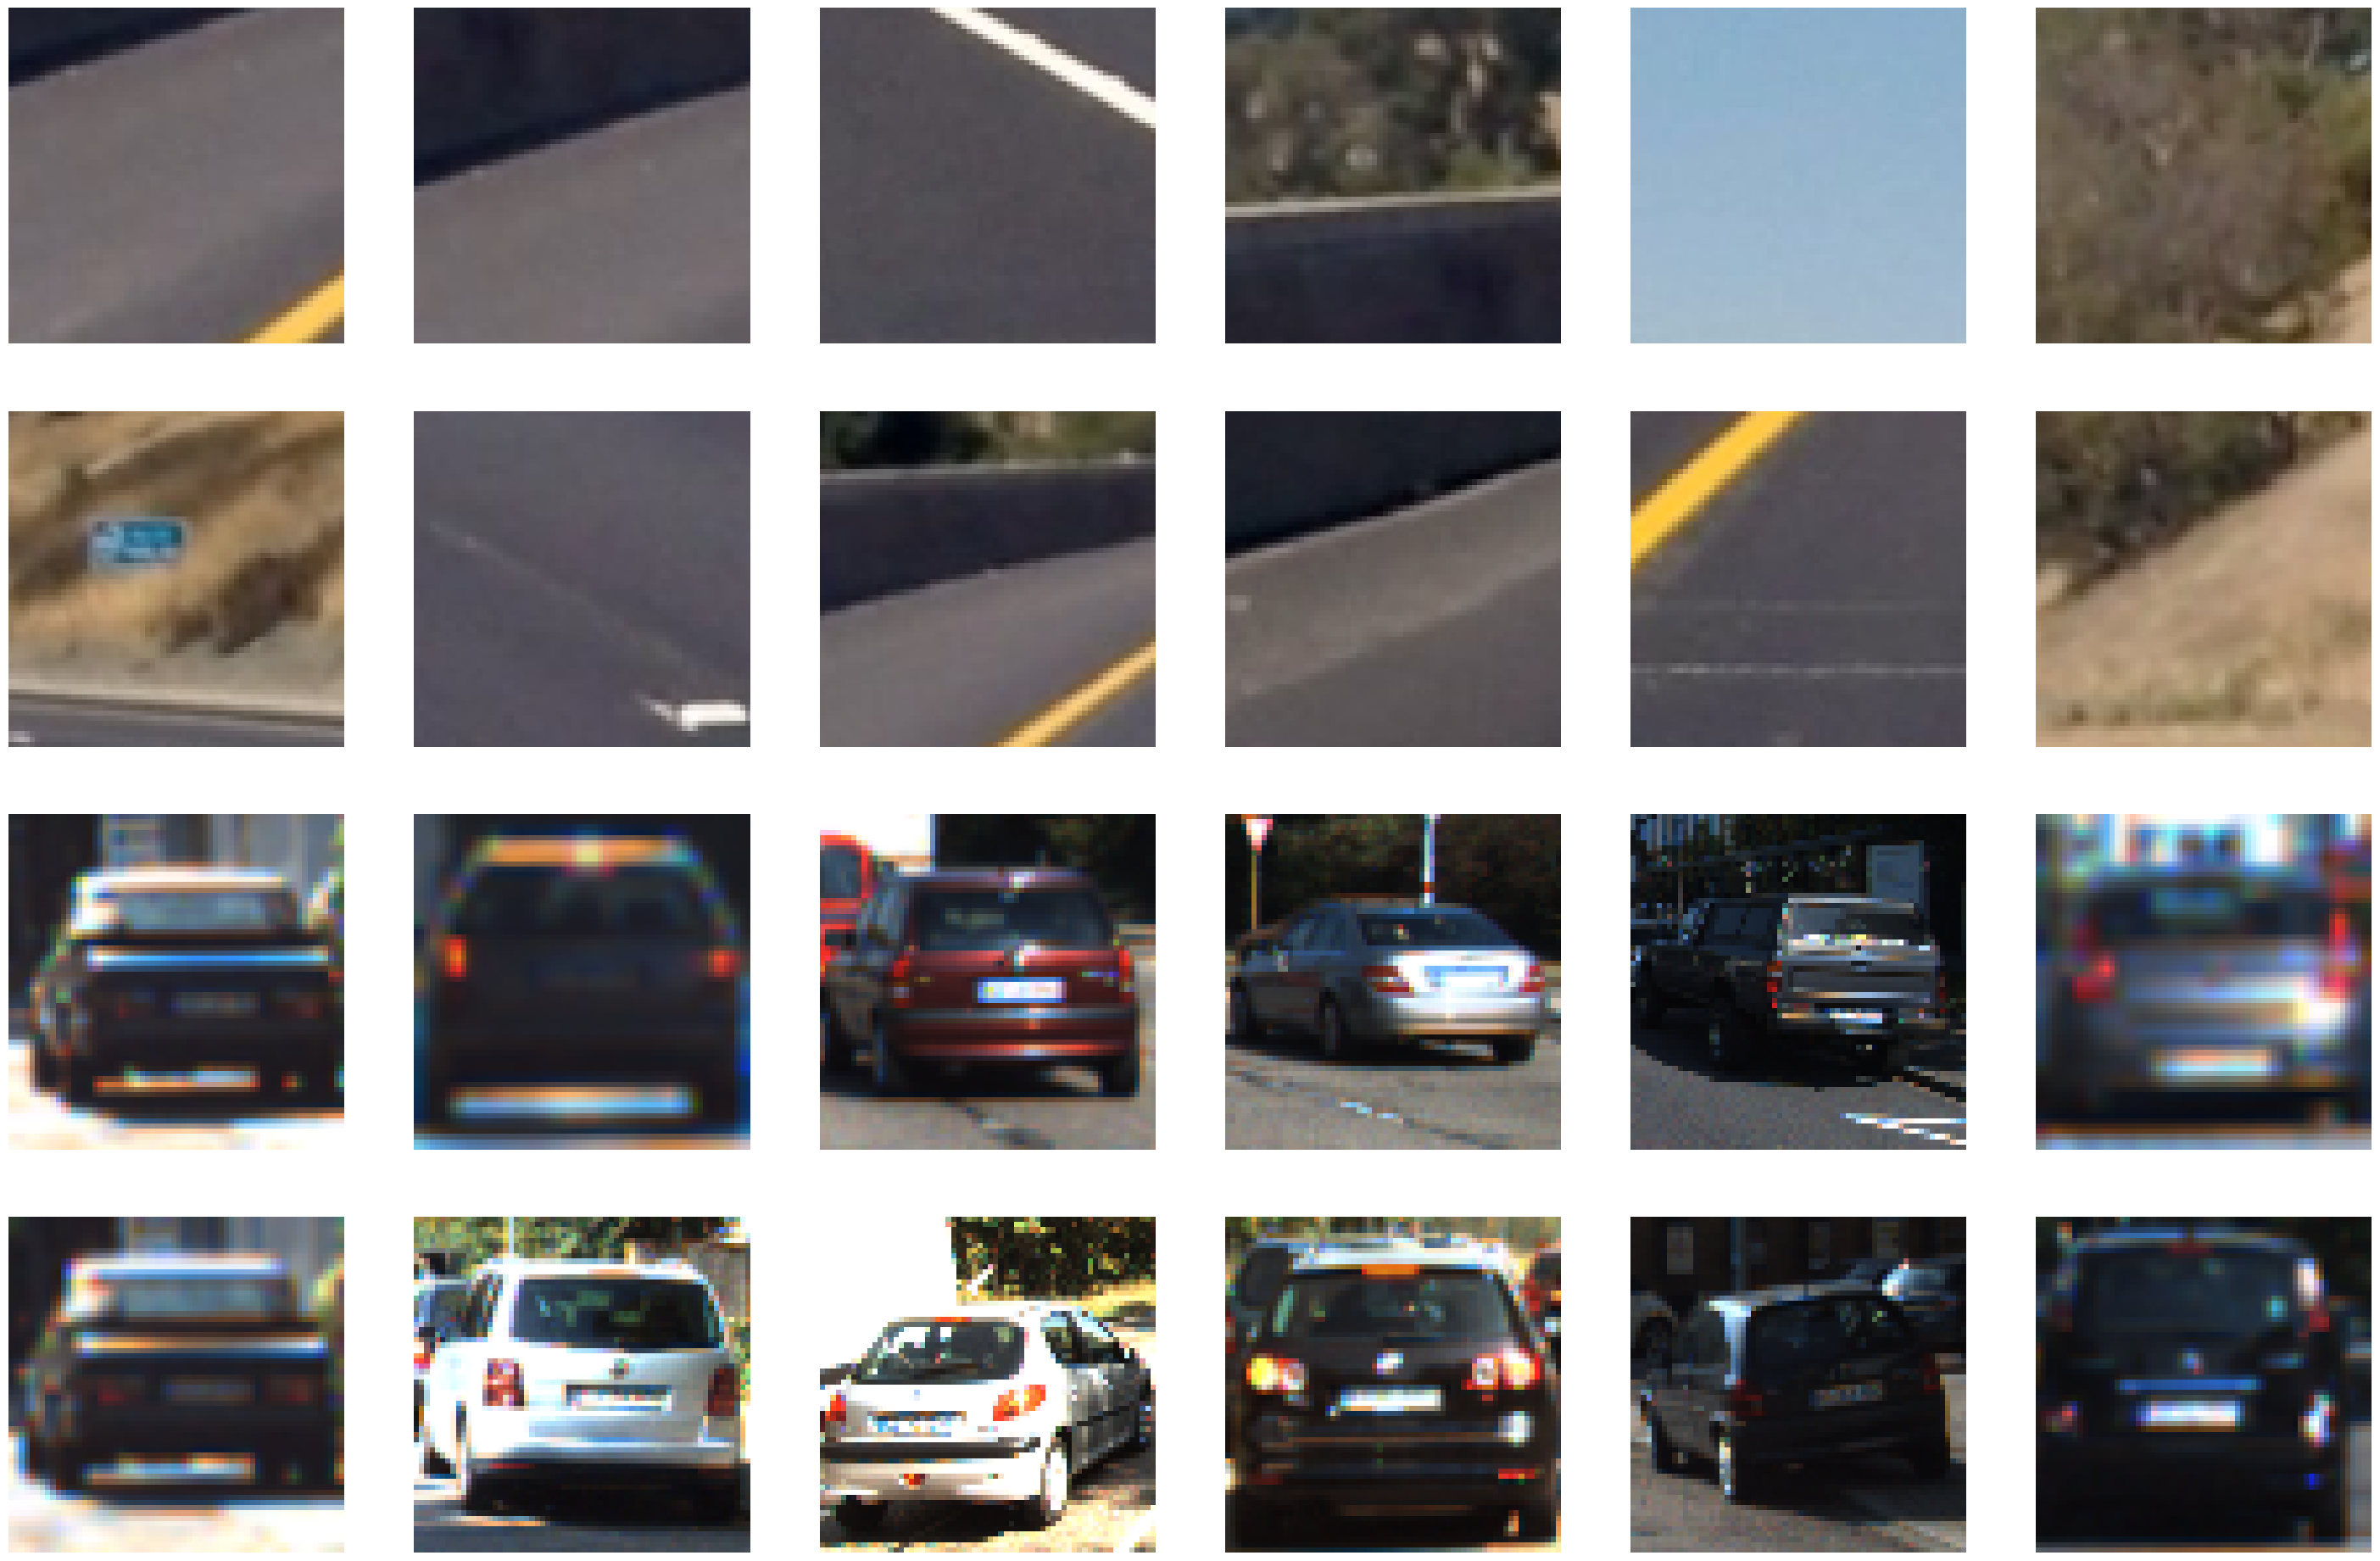

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 6, nrows * 6)

pic_index += 12
next_nonveh_pix = [os.path.join(train_nonveh_dir, fname)
                for fname in train_nonveh_fnames[pic_index-12:pic_index]]
next_veh_pix = [os.path.join(train_veh_dir, fname)
                for fname in train_veh_fnames[pic_index-12:pic_index]]

for i, img_path in enumerate(next_nonveh_pix+next_veh_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(64, 64, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496 

In [ ]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=200,  # 2000 images = batch_size * steps
      epochs= 15,
      validation_data=validation_generator,
      validation_steps=100,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
200/200 - 24s - loss: 2.1783e-11 - acc: 1.0000 - val_loss: 6.6269 - val_acc: 0.6610 - 24s/epoch - 122ms/step
Epoch 2/15
200/200 - 23s - loss: 8.1575e-12 - acc: 1.0000 - val_loss: 7.3929 - val_acc: 0.6490 - 23s/epoch - 117ms/step
Epoch 3/15
200/200 - 25s - loss: 1.1311e-11 - acc: 1.0000 - val_loss: 7.5075 - val_acc: 0.6470 - 25s/epoch - 125ms/step
Epoch 4/15
200/200 - 25s - loss: 1.1733e-11 - acc: 1.0000 - val_loss: 7.5808 - val_acc: 0.6445 - 25s/epoch - 124ms/step
Epoch 5/15
200/200 - 26s - loss: 1.2811e-11 - acc: 1.0000 - val_loss: 7.6347 - val_acc: 0.6435 - 26s/epoch - 132ms/step
Epoch 6/15
200/200 - 24s - loss: 1.3657e-11 - acc: 1.0000 - val_loss: 7.6780 - val_acc: 0.6435 - 24s/epoch - 122ms/step
Epoch 7/15
200/200 - 24s - loss: 1.3870e-11 - acc: 1.0000 - val_loss: 7.7144 - val_acc: 0.6430 - 24s/epoch - 122ms/step
Epoch 8/15
200/200 - 24s - loss: 1.4580e-11 - acc: 1.0000 - val_loss: 7.7457 - val_acc: 0.6415 - 24s/epoch - 121ms/step
Epoch 9/15
200/200 - 24s - loss: 1.4955e

1/1 [==============================] - 0s 147ms/step


<ipython-input-21-1c9d070ec2d4>:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


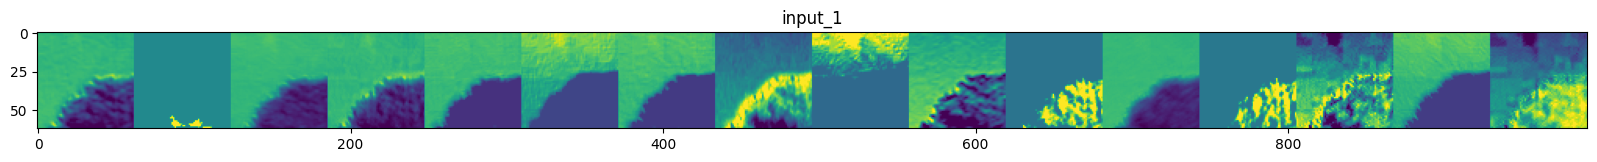

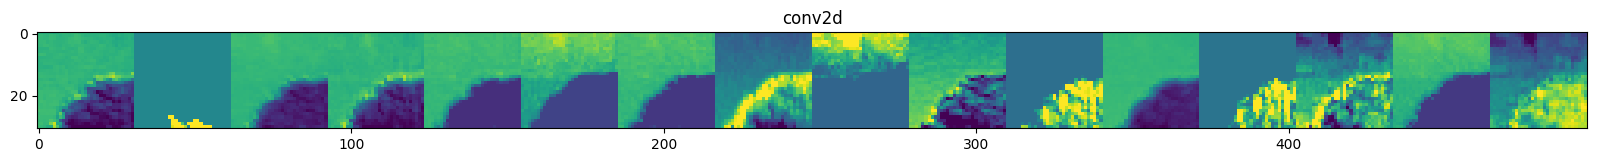

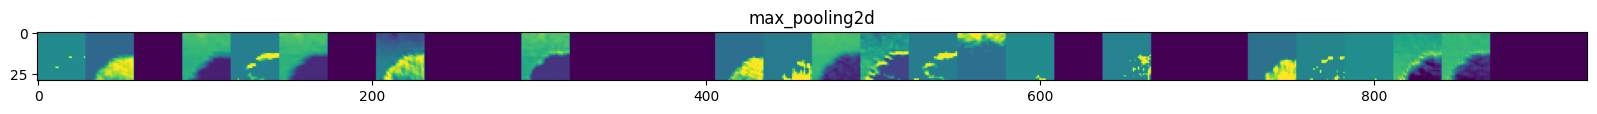

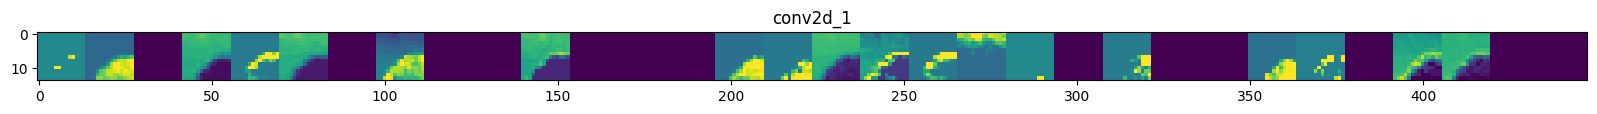

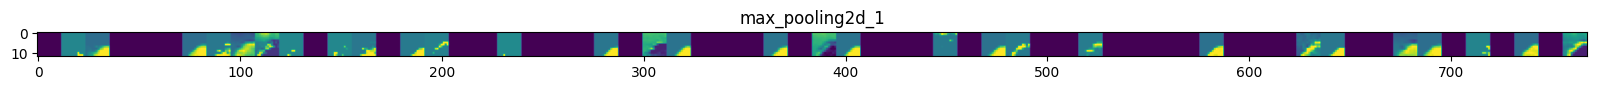

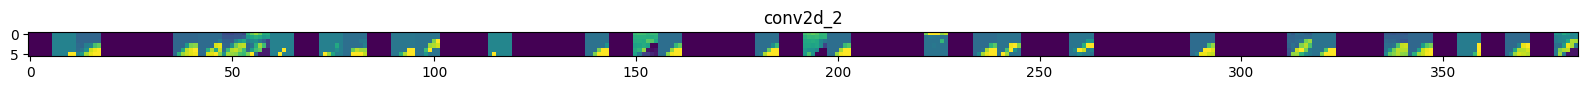

In [ ]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
nonveh_img_files = [os.path.join(train_nonveh_dir, f) for f in train_nonveh_fnames]
veh_img_files = [os.path.join(train_veh_dir, f) for f in train_veh_fnames]
img_path = random.choice(veh_img_files + nonveh_img_files)

img = load_img(img_path, target_size=(64, 64))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

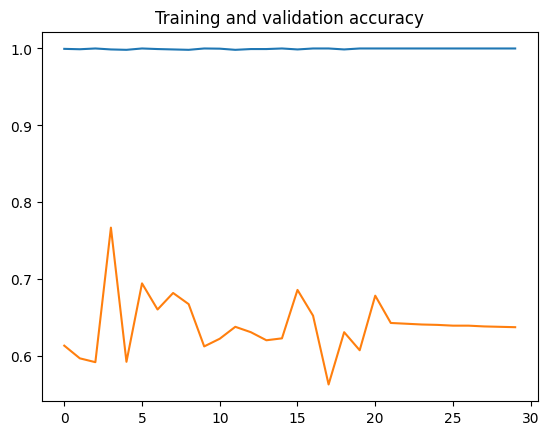

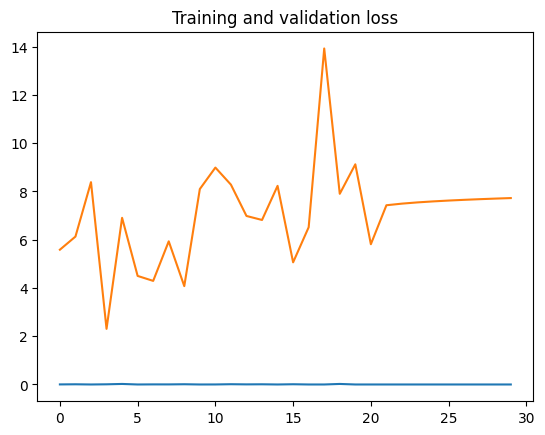

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
#Augmentation

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

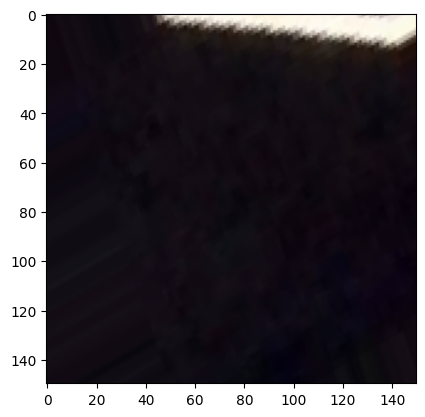

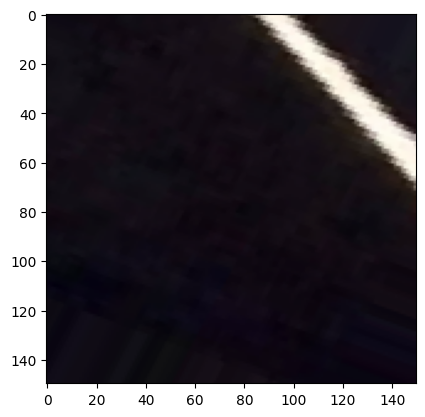

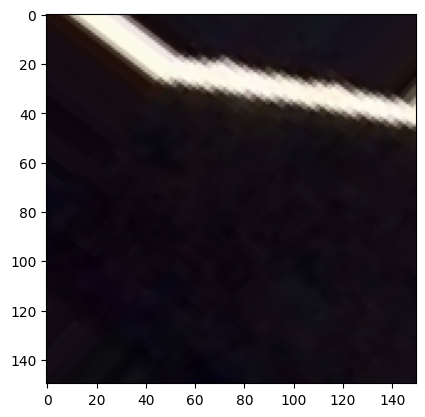

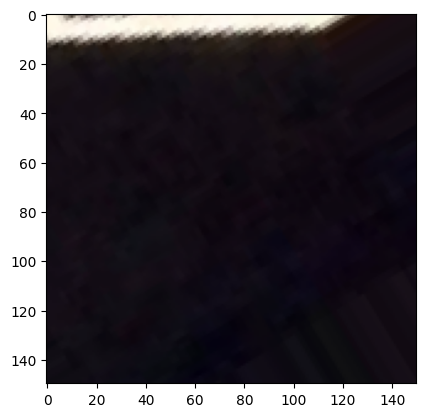

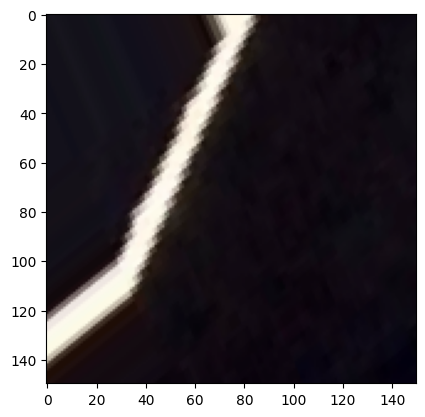

In [ ]:
img_path = os.path.join(train_nonveh_dir, train_nonveh_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [ ]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')


Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from keras import backend as K

import tensorflow as tf

# Configure the TF backend session
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.333
session = InteractiveSession(config=config)

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(64, 64, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_385 (Conv2D)         (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_386 (Conv2D)         (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_387 (Conv2D)         (None, 12, 12, 64)        1849

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 200,
                    epochs = 30,
                    validation_data = validation_generator,
                    validation_steps = 100,
                    verbose=2)

Epoch 1/30
200/200 - 31s - loss: 0.2329 - acc: 0.9190 - val_loss: 0.9504 - val_acc: 0.6280 - 31s/epoch - 154ms/step
Epoch 2/30
200/200 - 34s - loss: 0.0637 - acc: 0.9797 - val_loss: 1.7472 - val_acc: 0.6260 - 34s/epoch - 168ms/step
Epoch 3/30
200/200 - 28s - loss: 0.0340 - acc: 0.9895 - val_loss: 1.2331 - val_acc: 0.7390 - 28s/epoch - 138ms/step
Epoch 4/30
200/200 - 29s - loss: 0.0390 - acc: 0.9908 - val_loss: 0.8386 - val_acc: 0.8010 - 29s/epoch - 143ms/step
Epoch 5/30
200/200 - 28s - loss: 0.0416 - acc: 0.9923 - val_loss: 1.5318 - val_acc: 0.7415 - 28s/epoch - 141ms/step
Epoch 6/30
200/200 - 30s - loss: 0.0478 - acc: 0.9948 - val_loss: 0.6428 - val_acc: 0.8085 - 30s/epoch - 150ms/step
Epoch 7/30
200/200 - 30s - loss: 0.0456 - acc: 0.9948 - val_loss: 0.9053 - val_acc: 0.8065 - 30s/epoch - 150ms/step
Epoch 8/30
200/200 - 27s - loss: 0.0191 - acc: 0.9977 - val_loss: 1.3782 - val_acc: 0.7590 - 27s/epoch - 137ms/step
Epoch 9/30
200/200 - 29s - loss: 0.0196 - acc: 0.9960 - val_loss: 1.9972

Text(0.5, 1.0, 'Training and validation loss')

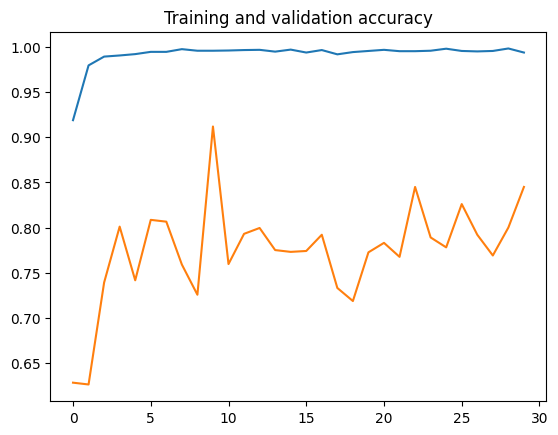

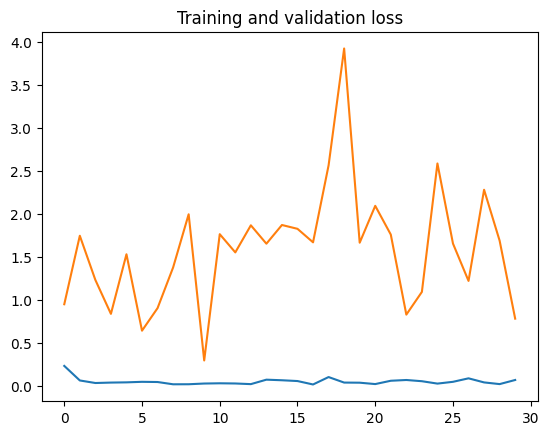

In [ ]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-25 14:06:30--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  95.6MB/s    in 0.9s    

2023-06-25 14:06:31 (95.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.333
session = InteractiveSession(config=config)

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(75, 75, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 3, 3, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(75, 75),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(75, 75),
        batch_size=20,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=200,
                    epochs=2,
                    validation_data=validation_generator,
                    validation_steps=100,
                    verbose=2)

Epoch 1/2
200/200 - 138s - loss: 0.0363 - acc: 0.9870 - val_loss: 0.0580 - val_acc: 0.9800 - 138s/epoch - 690ms/step
Epoch 2/2
200/200 - 75s - loss: 0.0113 - acc: 0.9970 - val_loss: 0.0175 - val_acc: 0.9945 - 75s/epoch - 377ms/step


In [ ]:
unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

from keras.optimizers import SGD

# As an optimizer, here we will use SGD
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(learning_rate=0.00001, momentum=0.9),
              metrics=['acc'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=200,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=100,
      verbose=2)

Epoch 1/10
200/200 - 94s - loss: 0.1222 - acc: 0.9740 - val_loss: 0.0791 - val_acc: 0.9775 - 94s/epoch - 472ms/step
Epoch 2/10
200/200 - 95s - loss: 0.1119 - acc: 0.9747 - val_loss: 0.0737 - val_acc: 0.9805 - 95s/epoch - 474ms/step
Epoch 3/10
200/200 - 117s - loss: 0.0916 - acc: 0.9822 - val_loss: 0.0654 - val_acc: 0.9840 - 117s/epoch - 584ms/step
Epoch 4/10
200/200 - 117s - loss: 0.0862 - acc: 0.9818 - val_loss: 0.0615 - val_acc: 0.9865 - 117s/epoch - 585ms/step
Epoch 5/10
200/200 - 117s - loss: 0.0811 - acc: 0.9865 - val_loss: 0.0562 - val_acc: 0.9900 - 117s/epoch - 583ms/step
Epoch 6/10
200/200 - 117s - loss: 0.0712 - acc: 0.9895 - val_loss: 0.0562 - val_acc: 0.9915 - 117s/epoch - 587ms/step
Epoch 7/10
200/200 - 97s - loss: 0.0710 - acc: 0.9858 - val_loss: 0.0529 - val_acc: 0.9910 - 97s/epoch - 485ms/step
Epoch 8/10
200/200 - 95s - loss: 0.0708 - acc: 0.9887 - val_loss: 0.0522 - val_acc: 0.9915 - 95s/epoch - 474ms/step
Epoch 9/10
200/200 - 97s - loss: 0.0644 - acc: 0.9895 - val_loss

Text(0.5, 1.0, 'Training and validation loss')

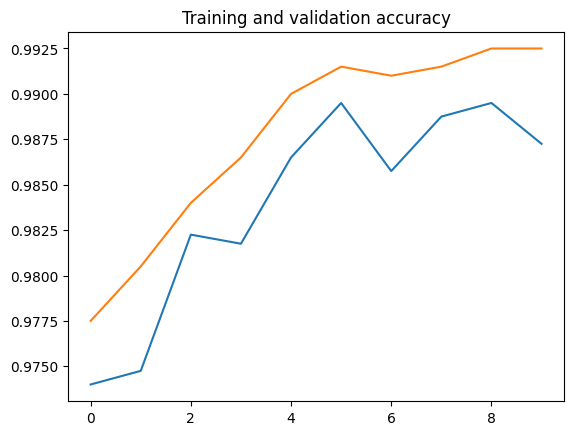

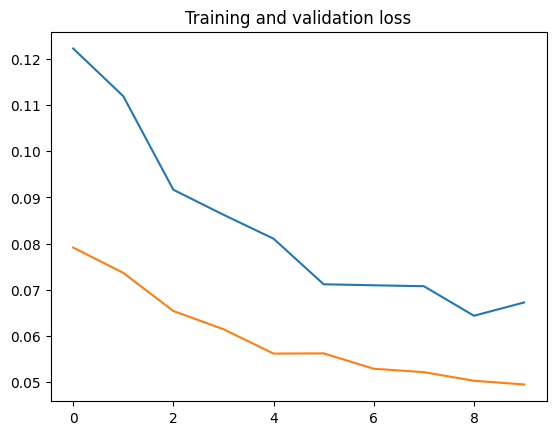

In [ ]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_291 (Conv2D)            (None, 37, 37, 32)   864         ['input_7[0][0]']                
                                                                                                  
 batch_normalization_282 (Batch  (None, 37, 37, 32)  96          ['conv2d_291[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_282 (Activation)    (None, 37, 37, 32)   0           ['batch_normalization_282[0